In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS, add_constant
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [10]:
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.6f}'.format})

In [2]:
df = pd.read_csv('./datasets/boston.csv')

In [3]:
df.head(2)

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6


In [4]:
df.shape

(506, 13)

In [6]:
features = df.drop(columns=['Median Home Value'])
target = df['Median Home Value']

In [7]:
model = PCA(n_components=features.shape[1])
features_pca = model.fit_transform(features)

In [8]:
features_pca[:5]

array([[-1.13002193e+02,  2.86786936e+00,  5.22622365e+00,
        -2.27621407e+00, -6.35976173e+00, -1.02924797e+00,
        -5.45841708e+00, -1.96570940e+00, -3.29179627e-01,
        -3.76815682e-01, -7.28402345e-02,  3.39055317e-02],
       [-1.64339238e+02,  3.07913767e+01,  1.26119071e+00,
         1.57292652e-01, -3.29028345e+00, -6.28296910e-01,
        -9.22169296e-01,  4.66716319e-01,  1.29985149e+00,
        -4.79206884e-02, -9.49527769e-02, -3.31635289e-02],
       [-1.65994946e+02,  1.68471287e+01, -1.02846512e+01,
        -2.42313525e-01, -5.90656703e+00,  1.69504797e+00,
        -4.63066931e-01,  3.88630994e-01,  9.10989267e-01,
         4.75787566e-01, -1.07794722e-01, -4.31262753e-03],
       [-1.87298841e+02,  6.70023829e+00, -1.96244425e+01,
         1.45097317e+00, -6.95801631e+00, -1.99782223e+00,
        -8.06526326e-01,  1.03350318e+00,  9.64874721e-01,
         2.87399660e-01, -5.43500966e-02,  4.43578253e-02],
       [-1.86517530e+02,  1.32767626e+01, -1.4172868

In [11]:
model.explained_variance_ratio_

array([0.960041, 0.027388, 0.008893, 0.001726, 0.000936, 0.000536,
       0.000320, 0.000110, 0.000039, 0.000009, 0.000002, 0.000000])

In [12]:
np.sum(model.explained_variance_ratio_)

np.float64(1.0)

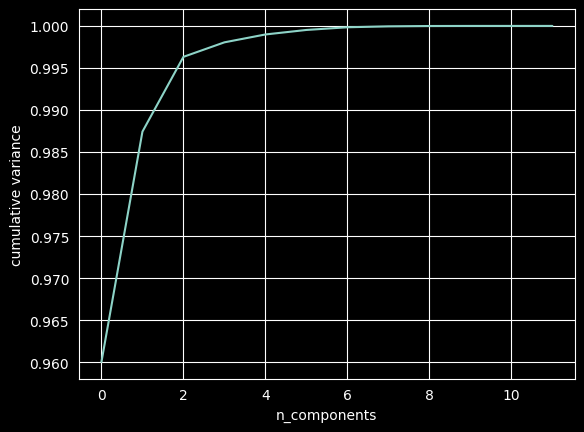

In [13]:
fig, ax = plt.subplots()

ax.plot(np.cumsum(model.explained_variance_ratio_))
ax.set_xlabel('n_components')
ax.set_ylabel('cumulative variance')

plt.show()

In [14]:
def build_model(regression_fn, target, features, n_components, constant):
    X = features
    y = target

    pca = PCA(n_components=n_components)
    X_new = pca.fit_transform(X)
    if constant is True:
        X_new = add_constant(X_new)

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    model = regression_fn(X_train, y_train)

    y_pred = model.predict(X_test)

    return {
        'x_initial': X,
        'x_transform': X_new,
        'x_train': X_train,
        'x_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'model': model,
    }